In [4]:
# import the packages and libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import requests
from bs4 import BeautifulSoup

In [10]:
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=947b5cbe-0b0a-4fdb-b06e-aca1e34d87fd&limit=175'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
res = requests.get(url, headers=headers)
records = res.json()


In [14]:
records

{'help': 'https://data.gov.sg/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'resource_id': '947b5cbe-0b0a-4fdb-b06e-aca1e34d87fd',
  'fields': [{'type': 'int4', 'id': '_id'},
   {'type': 'text', 'id': 'quarter'},
   {'type': 'text', 'id': 'level_1'},
   {'type': 'numeric', 'id': 'value'}],
  'records': [{'quarter': '1975-Q1',
    '_id': 1,
    'level_1': 'Residential Properties',
    'value': '8.9'},
   {'quarter': '1975-Q2',
    '_id': 2,
    'level_1': 'Residential Properties',
    'value': '9.1'},
   {'quarter': '1975-Q3',
    '_id': 3,
    'level_1': 'Residential Properties',
    'value': '9.1'},
   {'quarter': '1975-Q4',
    '_id': 4,
    'level_1': 'Residential Properties',
    'value': '9.1'},
   {'quarter': '1976-Q1',
    '_id': 5,
    'level_1': 'Residential Properties',
    'value': '9.5'},
   {'quarter': '1976-Q2',
    '_id': 6,
    'level_1': 'Residential Properties',
    'value': '9.5'},
   {'quarter': '1976-Q3',
    '_id': 7,
    'level_1': 

In [16]:
type(records)

dict

In [17]:
records['help']

'https://data.gov.sg/api/3/action/help_show?name=datastore_search'

In [21]:
records['result']['records']

[{'quarter': '1975-Q1',
  '_id': 1,
  'level_1': 'Residential Properties',
  'value': '8.9'},
 {'quarter': '1975-Q2',
  '_id': 2,
  'level_1': 'Residential Properties',
  'value': '9.1'},
 {'quarter': '1975-Q3',
  '_id': 3,
  'level_1': 'Residential Properties',
  'value': '9.1'},
 {'quarter': '1975-Q4',
  '_id': 4,
  'level_1': 'Residential Properties',
  'value': '9.1'},
 {'quarter': '1976-Q1',
  '_id': 5,
  'level_1': 'Residential Properties',
  'value': '9.5'},
 {'quarter': '1976-Q2',
  '_id': 6,
  'level_1': 'Residential Properties',
  'value': '9.5'},
 {'quarter': '1976-Q3',
  '_id': 7,
  'level_1': 'Residential Properties',
  'value': '9.8'},
 {'quarter': '1976-Q4',
  '_id': 8,
  'level_1': 'Residential Properties',
  'value': '9.5'},
 {'quarter': '1977-Q1',
  '_id': 9,
  'level_1': 'Residential Properties',
  'value': '9.5'},
 {'quarter': '1977-Q2',
  '_id': 10,
  'level_1': 'Residential Properties',
  'value': '9.5'},
 {'quarter': '1977-Q3',
  '_id': 11,
  'level_1': 'Resident

In [22]:
type(records['result']['records'])

list

In [40]:
df = pd.DataFrame.from_records(records['result']['records'])

In [41]:
df.head()

,_id,level_1,quarter,value
0,1,Residential Properties,1975-Q1,8.9
1,2,Residential Properties,1975-Q2,9.1
2,3,Residential Properties,1975-Q3,9.1
3,4,Residential Properties,1975-Q4,9.1
4,5,Residential Properties,1976-Q1,9.5


In [42]:
df['quarter'] = pd.to_datetime(df['quarter'])

In [44]:
df = df.set_index('quarter')

In [35]:
df['value']

quarter
1975-Q1      8.9
1975-Q2      9.1
1975-Q3      9.1
1975-Q4      9.1
1976-Q1      9.5
1976-Q2      9.5
1976-Q3      9.8
1976-Q4      9.5
1977-Q1      9.5
1977-Q2      9.5
1977-Q3      9.5
1977-Q4      9.1
1978-Q1      9.1
1978-Q2      9.5
1978-Q3      9.5
1978-Q4      9.8
1979-Q1     10.4
1979-Q2     10.9
1979-Q3     11.9
1979-Q4     12.7
1980-Q1     15.1
1980-Q2     17.7
1980-Q3     20.4
1980-Q4     23.9
1981-Q1     30.5
1981-Q2     34.6
1981-Q3       34
1981-Q4     32.2
1982-Q1       32
1982-Q2     32.8
           ...  
2011-Q2    145.1
2011-Q3      147
2011-Q4    147.4
2012-Q1    147.2
2012-Q2    147.9
2012-Q3    148.8
2012-Q4    151.5
2013-Q1    152.4
2013-Q2      154
2013-Q3    154.6
2013-Q4    153.2
2014-Q1    151.3
2014-Q2    149.7
2014-Q3    148.6
2014-Q4      147
2015-Q1    145.5
2015-Q2    144.2
2015-Q3    142.3
2015-Q4    141.6
2016-Q1    140.6
2016-Q2      140
2016-Q3    137.9
2016-Q4    137.2
2017-Q1    136.7
2017-Q2    136.6
2017-Q3    137.6
2017-Q4    138.7
2018-Q

In [46]:
df.index

DatetimeIndex(['1975-01-01', '1975-04-01', '1975-07-01', '1975-10-01',
               '1976-01-01', '1976-04-01', '1976-07-01', '1976-10-01',
               '1977-01-01', '1977-04-01',
               ...
               '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01',
               '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01',
               '2018-04-01', '2018-07-01'],
              dtype='datetime64[ns]', name='quarter', length=175, freq=None)

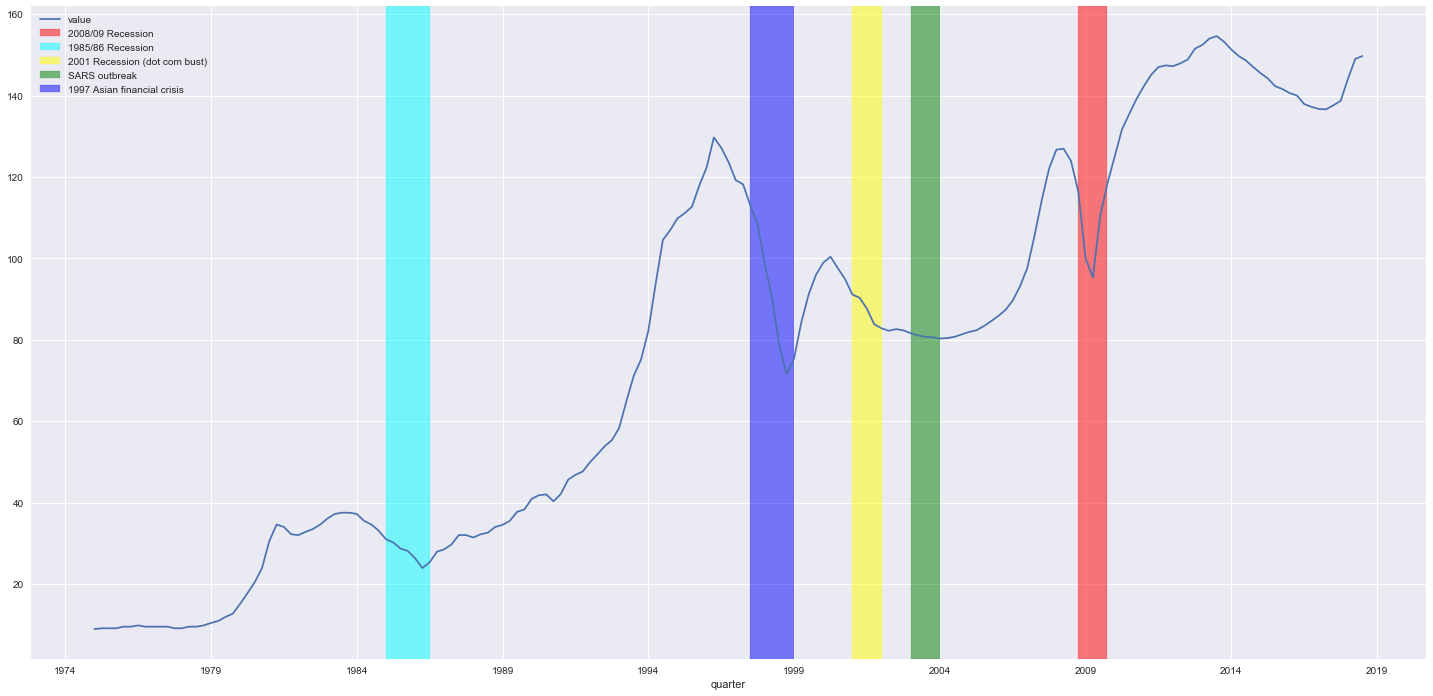

In [54]:
fig, ax = plt.subplots(figsize=(25,12))
df['value'] = df['value'].astype(float)
df.plot(y='value', ax=ax)
ax.axvspan('2008-10-01', '2009-11-01', alpha=0.5, color='red', label='2008/09 Recession')
ax.axvspan('1985-03-01', '1986-07-01', alpha=0.5, color='cyan', label='1985/86 Recession')
ax.axvspan('2001-01-01', '2002-01-01', alpha=0.5, color='yellow', label='2001 Recession (dot com bust)')
ax.axvspan('2003-02-01', '2004-01-01', alpha=0.5, color='green', label='SARS outbreak')
ax.axvspan('1997-07-01', '1999-03-01', alpha=0.5, color='blue', label ='1997 Asian financial crisis')
ax.legend(loc='best')

##sources:
#http://www.mas.gov.sg/News-and-Publications/Speeches-and-Monetary-Policy-Statements/Speeches/2015/An-Economic-History-of-Singapore.aspx
#